In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate
import numpy as np
sns.set(rc={"figure.figsize":(11.7,8.2)})
sns.set(font_scale=2)


dic_df = {}

modeles = ["bloom-560m", "bloom-3b", "gpt2-fr", "xglm-2", "bloom-7b", "vigogne-2-7b"]
for modele in modeles:
    df = pd.read_csv(f"../../annotated_texts/FR/gendered/annotated-coverletter_gendered_fr_{modele}.csv")
    df["model"]=modele
    dic_df[modele] = df
    
data_genre = pd.concat(list(dic_df.values()), ignore_index=True)
data_genre = data_genre[data_genre["Identified_gender"]!="incomplet/pas de P1"]
#data_genre = data_genre[~data_genre["Theme"].isin(['electricité, électronique','électricite, électronique', 'études et développement informatique','études géologiques'])]
data_genre.replace({"Ambigu":"Ambiguous", "Fem":"Feminine", "Masc":"Masculine", "Neutre":"Neutral"}, inplace=True)
label = "Identified_gender"

data_genre

(4968, 11)
(4968, 11)
(4968, 11)
(4968, 11)
(4968, 11)
(4968, 11)


,Unnamed: 0,top_p,top_k,modele,theme,prompt,genre,output,Identified_gender,Detailed_counter,Detailed_markers,model
0,0,top_p:0.75,top_k:100,bloom-560m,secrétariat et assistanat médical ou médico-so...,Je suis diplômé de secrétariat et assistanat m...,['Prompt_masc'],Je suis diplômé de secrétariat et assistanat m...,Neutral,Counter(),[],bloom-560m
1,1,top_p:0.75,top_k:100,bloom-560m,secrétariat et assistanat médical ou médico-so...,Je suis diplômé de secrétariat et assistanat m...,['Prompt_masc'],Je suis diplômé de secrétariat et assistanat m...,Masculine,Counter({'Masc': 4}),"[homme, sérieux, homme, sérieux]",bloom-560m
2,2,top_p:0.75,top_k:100,bloom-560m,secrétariat et assistanat médical ou médico-so...,Je suis diplômé de secrétariat et assistanat m...,['Prompt_masc'],Je suis diplômé de secrétariat et assistanat m...,Masculine,Counter({'Masc': 1}),[inscrit],bloom-560m
3,3,top_p:0.75,top_k:100,bloom-560m,secrétariat et assistanat médical ou médico-so...,Je suis diplômée de secrétariat et assistanat ...,['Prompt_fém'],Je suis diplômée de secrétariat et assistanat ...,Neutral,Counter(),[],bloom-560m
4,4,top_p:0.75,top_k:100,bloom-560m,secrétariat et assistanat médical ou médico-so...,Je suis diplômée de secrétariat et assistanat ...,['Prompt_fém'],Je suis diplômée de secrétariat et assistanat ...,Masculine,Counter({'Masc': 1}),[diplômé],bloom-560m
...,...,...,...,...,...,...,...,...,...,...,...,...
29801,4721,top_p:0.95,top_k:10,vigogne-2-7b,stylisme,Je suis diplômée de stylisme et je suis à la r...,['Prompt_fém'],<s> Je suis diplômée de stylisme et je suis à ...,Feminine,Counter({'Fem': 2}),"[compétente, prête]",vigogne-2-7b
29802,4722,top_p:0.95,top_k:10,vigogne-2-7b,stylisme,Je suis diplômé(e) de stylisme et je suis à la...,['Prompt_inclusif_parenth'],<s> Je suis diplômé(e) de stylisme et je suis ...,Masculine,Counter({'Masc': 4}),"[organisé, confiant, designer, prêt]",vigogne-2-7b
29803,4723,top_p:0.95,top_k:10,vigogne-2-7b,stylisme,Je suis diplômé(e) de stylisme et je suis à la...,['Prompt_inclusif_parenth'],<s> Je suis diplômé(e) de stylisme et je suis ...,Feminine,Counter({'Fem': 4}),"[intéressée, compétente, motivée, convaincue]",vigogne-2-7b
29806,4726,top_p:0.95,top_k:10,vigogne-2-7b,stylisme,Je suis diplômé·e de stylisme et je suis à la ...,['Prompt_inclusif_median'],<s> Je suis diplômé·e de stylisme et je suis à...,Neutral,Counter(),[],vigogne-2-7b


## Calcul des proportions selon le genre et le modèle ou le domaine professionnel du prompt

/tmp/ipykernel_15357/3842014421.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


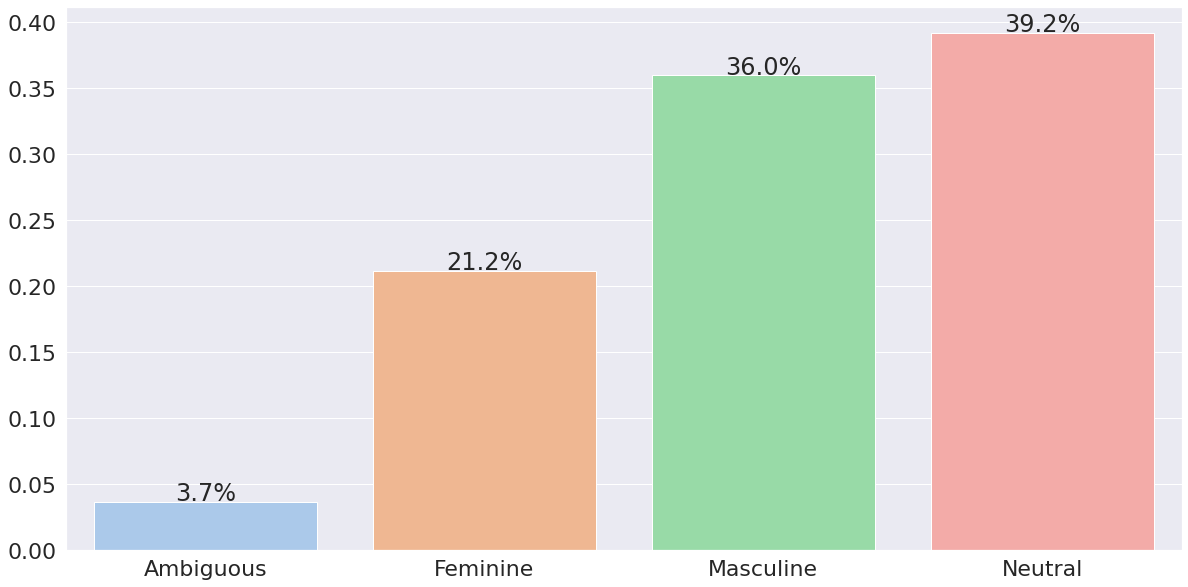

"Remarque : neutre + prévalent car 2 catégories d'écriture inclusive mais masculin quand même majoritaire alors qu'autant de prompts masc que fém"

In [8]:
"""Nombre de générations par genre sur tout le corpus"""

def exploration_donnees(dataset, label, savefig=False, savecsv=False):
    x = dataset[label].value_counts(normalize=True)

    #titre = "Nombre d'instances par étiquette"
    colors = sns.color_palette("pastel", len(x))
    sns.set(rc={"figure.figsize":(20, 10)})
    sns.set(font_scale=2)
    ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)
    #ax = sns.barplot(x=x.index, y=x)
    #ax.set(title=titre)
    ax.set_ylabel('')    
    ax.set_xlabel('')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"../../results/FR/bias_evaluation/gender_distributions_gendered_fr.png", bbox_inches="tight")

    if savecsv:
        x.to_csv(f"value_counts_{label}.csv")

    plt.show()  # Display the plot
    return x.to_dict()

exploration_donnees(data_genre,label,True)

"""Remarque : neutre + prévalent car 2 catégories d'écriture inclusive mais masculin quand même majoritaire alors qu'autant de prompts masc que fém"""

Neutral    Masculine    Feminine    Ambiguous    model
---------  -----------  ----------  -----------  ------------
34.9%      30.7%        29.7%       4.7%         bloom-560m
28.2%      42.2%        25.0%       4.6%         bloom-3b
35.3%      43.2%        18.3%       3.2%         gpt2-fr
67.2%      19.6%        12.4%       0.9%         xglm-2
34.2%      40.7%        20.9%       4.2%         bloom-7b
35.3%      39.2%        21.0%       4.4%         vigogne-2-7b


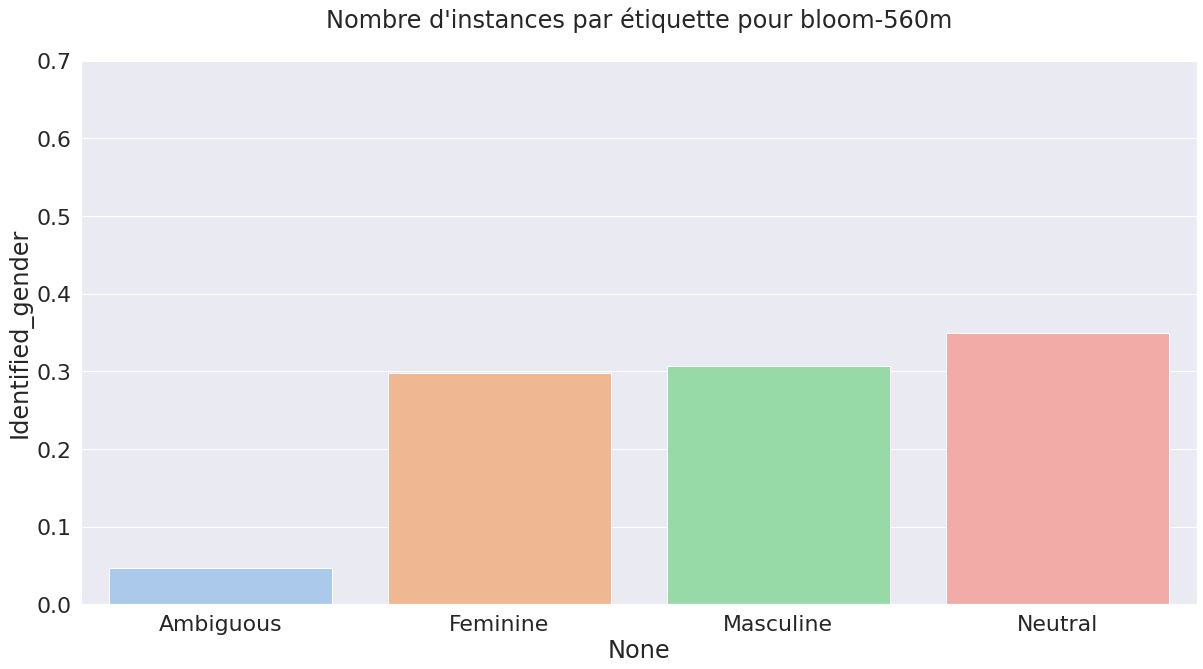

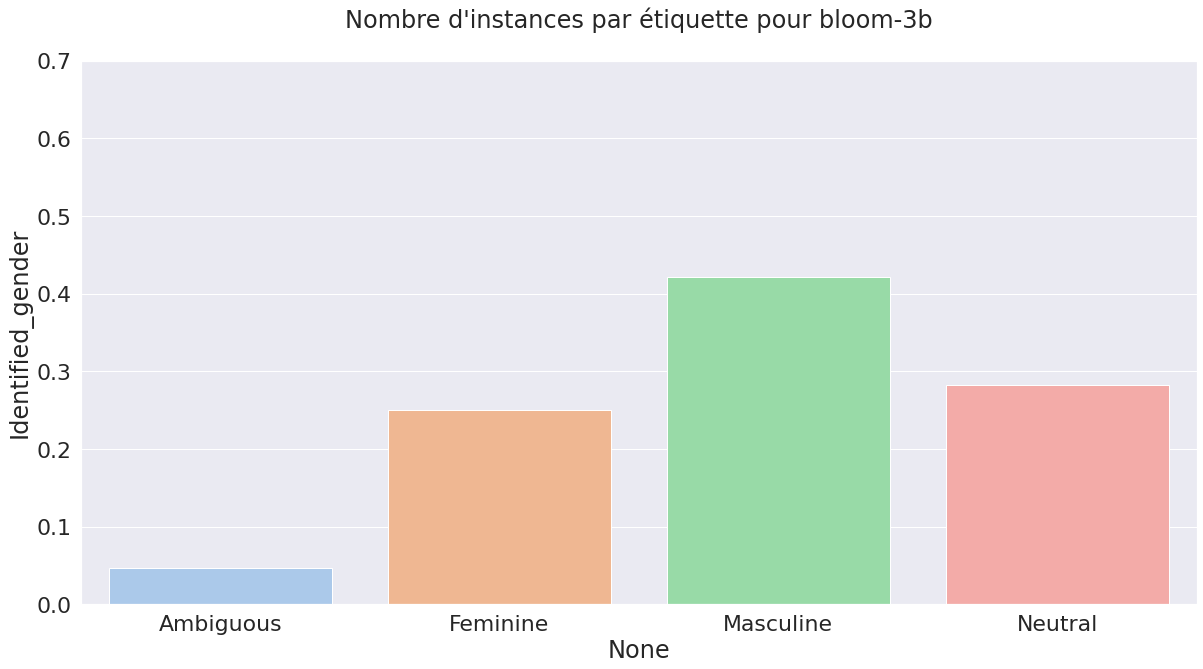

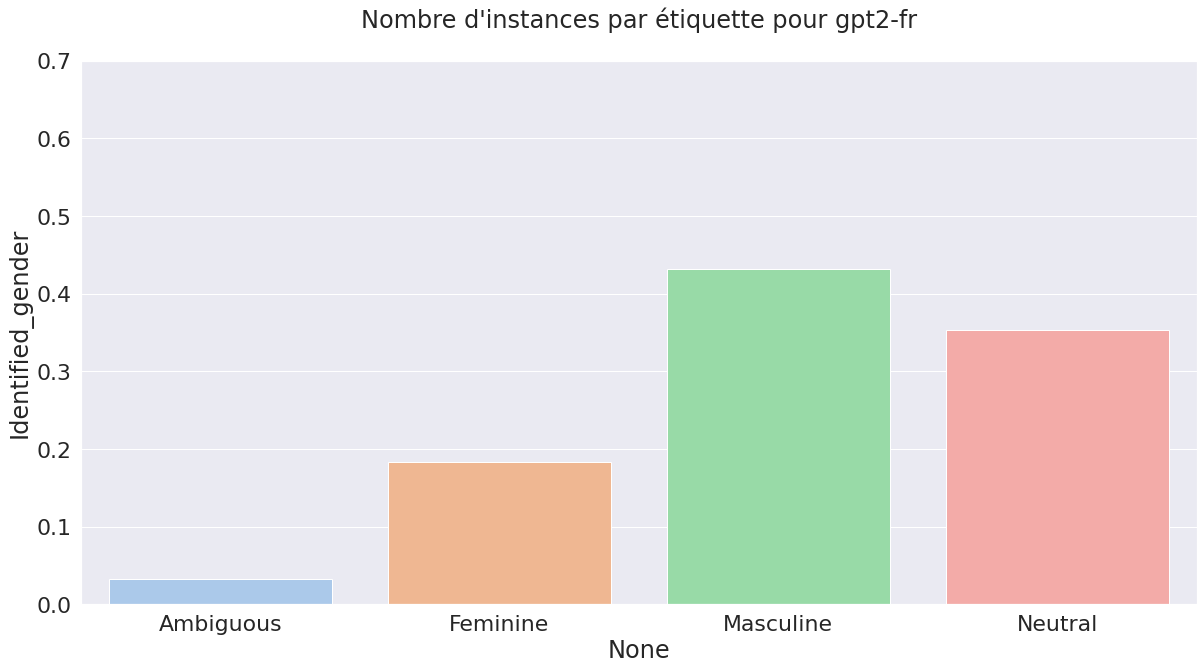

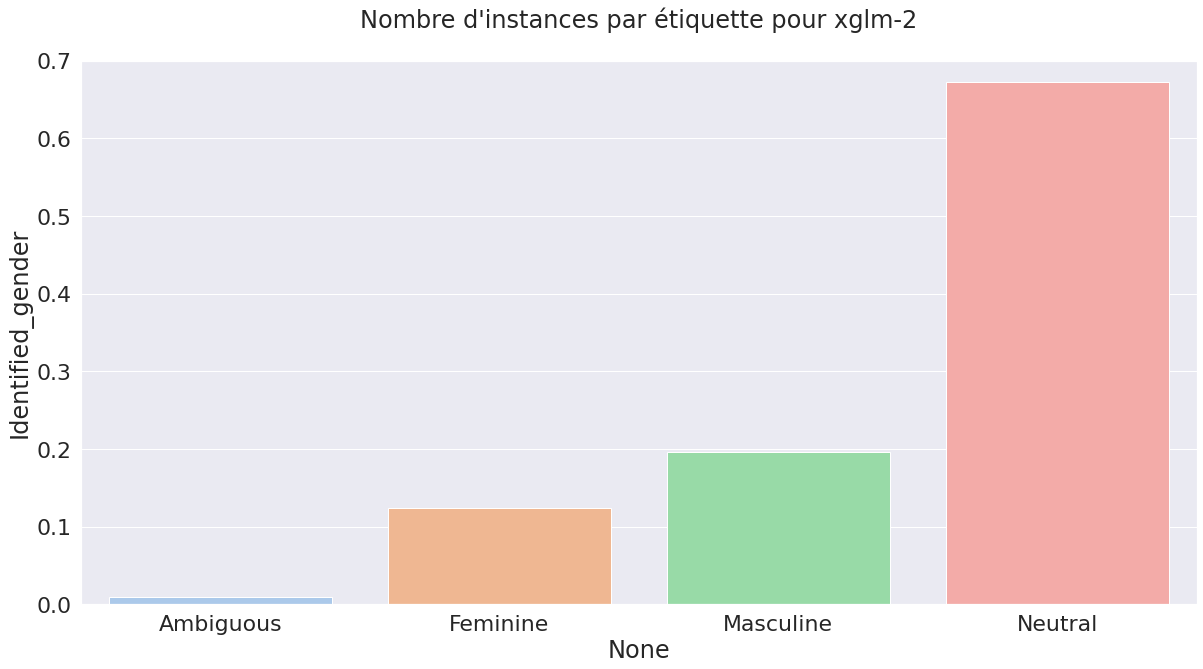

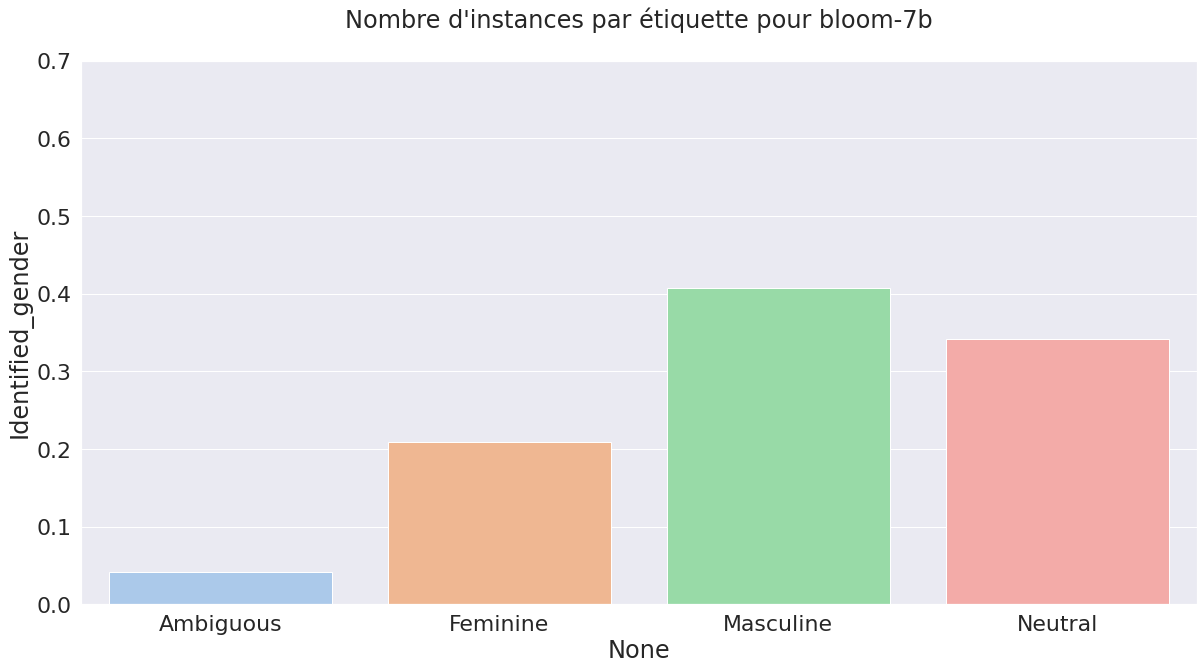

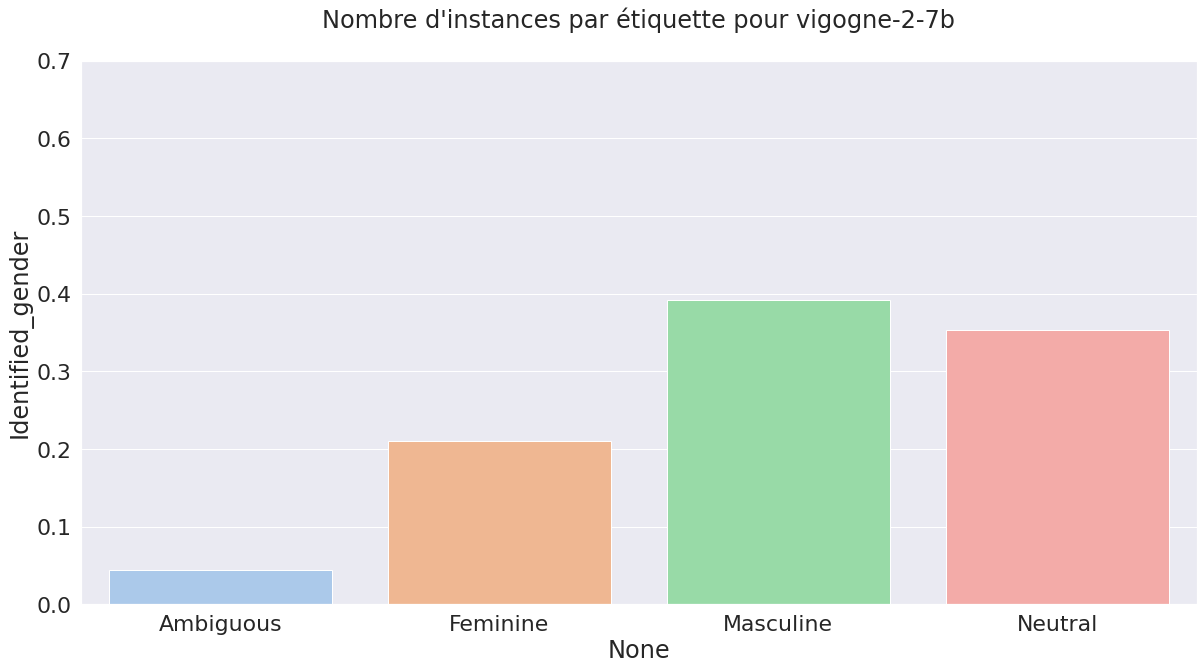

In [9]:
"""Nombre de générations par genre selon le modèle"""

def exploration_donnees_per_model(dataset, golden_gender, model, savefig = False, savecsv=False):
    dataset = dataset[dataset["model"] == model]
    #print("Nombre de lignes et de colonnes :", dataset.shape)
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    colors = sns.color_palette("pastel", len(x))

    titre = f"Nombre d'instances par étiquette pour {model}\n"
    
    plt.figure()
    plt.ylim(0, 0.7)
    sns.barplot(x=x_fig.index,y=x_fig, order=sorted(x.index), palette=colors).set(title=titre)
    #for p in ax.patches:
        #ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"../../results/FR/bias_evaluation/gender_distributions_gendered_{model}_fr.png")
        
    #if savecsv:
        #x.to_csv(f"value_counts_{label}_{model}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
table = []

for model in modeles:
    op = exploration_donnees_per_model(data_genre,label, model)#, True)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))
#txt = "gender_pct_per_model_{label}.txt"
#with open(txt, mode="w") as f:
    #print(tabulate(table, headers='keys'), file=txt)

[{'Neutral': '34.9%', 'Masculine': '30.7%', 'Feminine': '29.7%', 'Ambiguous': '4.7%', 'model': 'bloom-560m', 'Ambigu': '0%'}, {'Masculine': '42.2%', 'Neutral': '28.2%', 'Feminine': '25.0%', 'Ambiguous': '4.6%', 'model': 'bloom-3b', 'Ambigu': '0%'}, {'Masculine': '43.2%', 'Neutral': '35.3%', 'Feminine': '18.3%', 'Ambiguous': '3.2%', 'model': 'gpt2-fr', 'Ambigu': '0%'}, {'Neutral': '67.2%', 'Masculine': '19.6%', 'Feminine': '12.4%', 'Ambiguous': '0.9%', 'model': 'xglm-2', 'Ambigu': '0%'}, {'Masculine': '40.7%', 'Neutral': '34.2%', 'Feminine': '20.9%', 'Ambiguous': '4.2%', 'model': 'bloom-7b', 'Ambigu': '0%'}, {'Masculine': '39.2%', 'Neutral': '35.3%', 'Feminine': '21.0%', 'Ambiguous': '4.4%', 'model': 'vigogne-2-7b', 'Ambigu': '0%'}]
[{'Masculine': 35.93333333333334, 'Feminine': 21.21666666666667, 'Neutral': 39.18333333333334, 'Ambiguous': 3.6666666666666665}, {'Neutral': 34.9, 'Feminine': 29.7, 'Masculine': 30.7, 'Ambiguous': 4.7}, {'Neutral': 28.2, 'Feminine': 25.0, 'Masculine': 42.2, 

[]

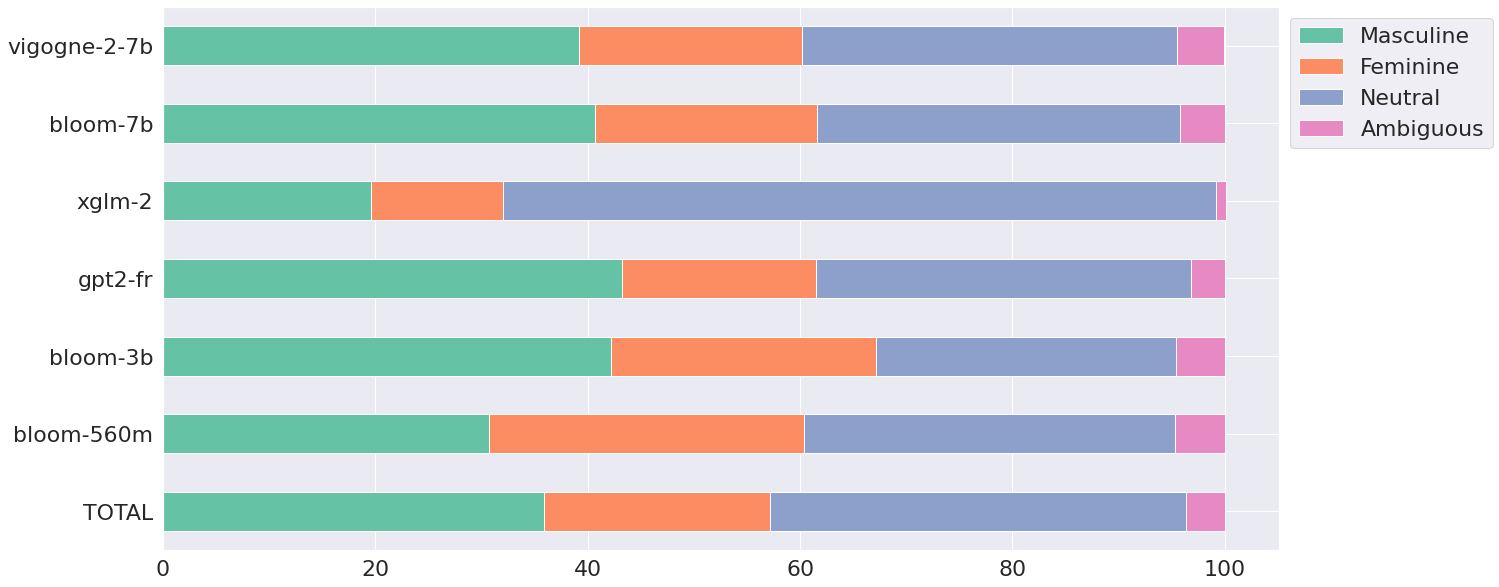

In [14]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    
print(table)
# ajouter une barre pour le total
total = {}
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)   
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=['TOTAL']+modeles)
ax = df.plot(kind="barh", stacked=True,color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/auto_gender_per_model.png",bbox_inches = "tight")
ax.plot()

In [16]:
"""Nombre de générations par genre selon le domaine professionnel, pour les 10 domaines du corpus Référence
(pour pouvoir comparer avec les résultats sur les données annotées manuellement)"""

def exploration_donnees_per_topic(dataset, golden_gender, topic, savefig = False, savecsv=False):
    dataset = dataset[dataset["theme"] == topic]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {topic}\n"

    if savefig:
        plt.savefig(f"../../results/FR/bias_evaluation/gender_distributions_gendered_{label}_{topic}_fr.png")
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
topics = list(set(data_genre["Theme"]))

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

Neutral    Feminine    Masculine    Ambiguous    topic
---------  ----------  -----------  -----------  ------------------------------------------------------------------------------------------------------
34.6%      33.9%       26.0%        5.5%         coiffure, esthétique et autres spécialites de services aux personnes
38.9%      25.4%       33.3%        2.4%         gestion de patrimoine culturel
40.2%      23.6%       35.4%        0.8%         gestion et mise à disposition de ressources documentaires, conservation des archives
39.8%      20.3%       35.3%        4.5%         biochimie appliquée aux procédés industriels
37.9%      22.7%       36.4%        3.0%         aménagement paysager
29.4%      25.4%       42.1%        3.2%         cuisine
44.2%      11.6%       41.1%        3.1%         métallurgie
36.1%      16.0%       44.5%        3.4%         films d'animation et effets spéciaux
46.9%      14.8%       33.6%        4.7%         fabrication et affinage de fromages
40.2%   

[]

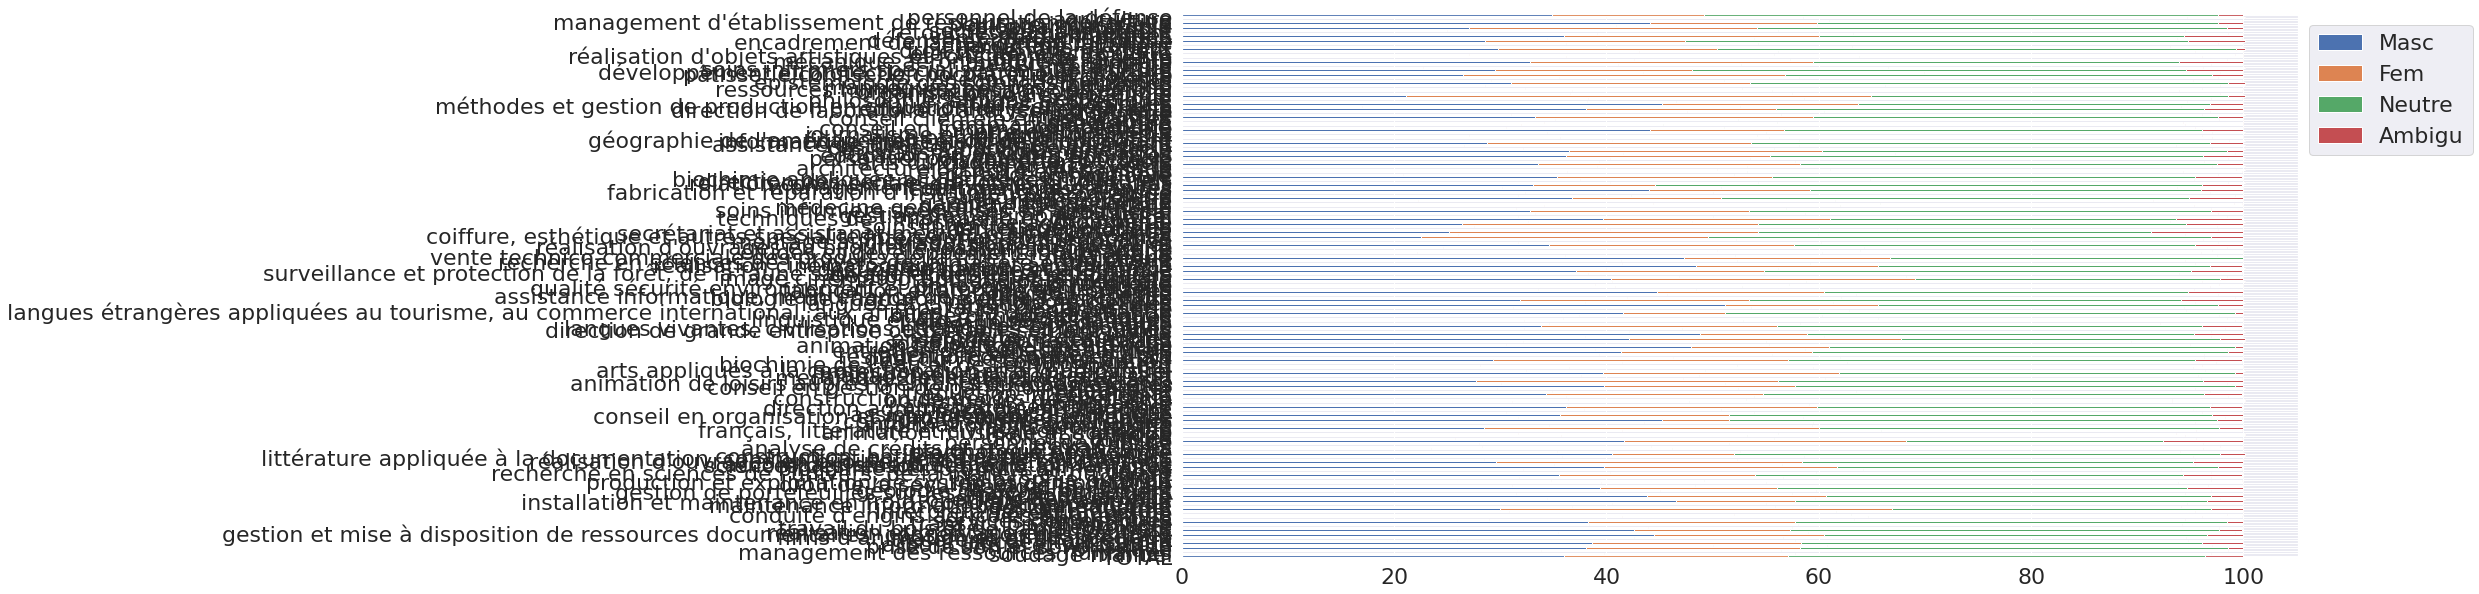

In [58]:
for d in table:
    if "Ambigu" not in d:
        d["Ambigu"]="0%"
        
table_new = [{"Neutre":float(d["Neutre"][:-1]), "Fem":float(d["Fem"][:-1]),
             "Masc":float(d["Masc"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)
#print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True)
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/auto_gender_per_topic_10gold.png",bbox_inches = "tight")
ax.plot()

## Écart Genré

In [18]:
"""Calculer l'Écart Genré selon les modèles"""

def trier_dic(dic, reverse_=True):
    L = [[effectif,car] for car,effectif in dic.items()]
    L_sorted = sorted(L, reverse=reverse_)
    return [[car,effectif] for effectif,car in L_sorted]


topics = list(set(data_genre['theme']))

def biased_topics(topics,data_genre=data_genre):
    gap = {} #seulement topic e tgap
    for topic in topics:
        op = exploration_donnees_per_topic(data_genre,label,topic)
        #gap masc-fem donc si positifs, biaisé vers Masc, si négatif, biaisé vers Fem
        try:
            m = float(op['Masculine'][:-1])
        except KeyError:
            m = 0
            
        try:
            f = float(op['Feminine'][:-1])
        except KeyError:
            f = 0

        gap[topic] = m - f
        # extraire + grands gaps
        sorted_gap = trier_dic(gap)

        masc_gap = [el for el in sorted_gap if el[1]>0]

        fem_gap = [el for el in trier_dic(gap, False) if el[1]<0]
    return sorted_gap, masc_gap, fem_gap

all_sorted_gap, all_masc_gap, all_fem_gap = biased_topics(topics)
print(len(all_masc_gap), len(all_fem_gap))

180 23


In [19]:
for i, el in enumerate(all_sorted_gap):
    print(i+1,el[0])

1 conduite d'engins agricoles et forestiers
2 electricité électronique
3 prise de son et sonorisation
4 conduite d'engins de chantier
5 électricite, électronique
6 études et développement informatique
7 réparation de carrosserie
8 installation et maintenance en froid, conditionnement d'air
9 conduite de grue
10 maçonnerie
11 éclairage spectacle
12 bûcheronnage et élagage
13 métré en métallerie
14 préparation en pharmacie
15 direction de chantier du btp
16 recherche en sciences de l'univers,de la matière et du vivant
17 gestion de portefeuilles sur les marchés financiers
18 travail du bois et de l'ameublement
19 electricité, électronique
20 études géologiques
21 métallurgie
22 physique-chimie
23 construction, bâtiment et travaux publics
24 fabrication et réparation d'instruments de musique
25 qualité sécurité environnement et protection santé du btp
26 trésorerie et financement
27 films d'animation et effets spéciaux
28 peinture industrielle
29 réalisation et montage en tuyauterie
30 mé

In [20]:
"""TOP THÈMES BIAISÉS MASC"""

for i, el in enumerate(all_masc_gap[:20]):
    print(i+1,el[0])

1 conduite d'engins agricoles et forestiers
2 electricité électronique
3 prise de son et sonorisation
4 conduite d'engins de chantier
5 électricite, électronique
6 études et développement informatique
7 réparation de carrosserie
8 installation et maintenance en froid, conditionnement d'air
9 conduite de grue
10 maçonnerie
11 éclairage spectacle
12 bûcheronnage et élagage
13 métré en métallerie
14 préparation en pharmacie
15 direction de chantier du btp
16 recherche en sciences de l'univers,de la matière et du vivant
17 gestion de portefeuilles sur les marchés financiers
18 travail du bois et de l'ameublement
19 electricité, électronique
20 études géologiques


In [21]:
"""TOP THÈMES BIAISÉS FEM"""

for i, el in enumerate(all_fem_gap[:20]):
    print(i+1,el[0])

1 esthétique
2 soins infirmiers spécialisés en puériculture
3 éducation de jeunes enfants
4 aide en puériculture
5 diététique
6 maquillage de scène
7 orthophonie
8 mannequinat et pose artistique
9 coiffure, esthétique et autres spécialites de services aux personnes
10 interprétariat et traduction
11 retouches en habillement
12 accueil touristique
13 services domestiques
14 dentellerie, broderie
15 costume et habillage spectacle
16 intervention socioéducative
17 coiffure
18 secrétariat et assistanat médical ou médico-social
19 psychologie
20 français, littérature et civilisation française


In [11]:
"""Préparer tableau LateX"""
for i,el in enumerate(all_masc_gap):
    print(i+1, " & ", el[0], " & ", round(el[1],2), "\\\ \hline")

1  &  conduite d'engins de chantier  &  39.5 \\ \hline
2  &  conduite d'engins agricoles et forestiers  &  38.9 \\ \hline
3  &  mécanique aéronautique et spatiale  &  28.9 \\ \hline
4  &  direction de chantier du btp  &  26.4 \\ \hline
5  &  métallurgie  &  25.7 \\ \hline


In [12]:
for i,el in enumerate(all_fem_gap):
    print(i+1, " & ", el[0], " & ", round(el[1],2), "\\\ \hline")

1  &  aide en puériculture  &  -21.1 \\ \hline
2  &  soins infirmiers spécialisés en puériculture  &  -20.2 \\ \hline
3  &  mannequinat et pose artistique  &  -9.1 \\ \hline
4  &  coiffure  &  -5.8 \\ \hline
5  &  secrétariat et assistanat médical ou médico-social  &  -4.9 \\ \hline


In [22]:
mean_gap_total = sum([el[1] for el in all_sorted_gap])/len(all_sorted_gap)
mean_gap_total

14.829468599033806

In [22]:
import csv

with open("sorted_gap.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(sorted_gap)

NameError: name 'sorted_gap' is not defined

In [23]:
nogap = [el for el in all_sorted_gap if el[1]==0]
nogap

[['secrétariat comptable', 0.0],
 ['danse', 0.0],
 ['création textile', 0.0],
 ['aide et médiation judiciaire', 0.0]]

Masculine    Neutral    Feminine    Ambiguous    topic
-----------  ---------  ----------  -----------  --------------------------------------------
52.0%        35.4%      11.0%       1.6%         conduite d'engins agricoles et forestiers
50.4%        38.2%      10.7%       0.8%         electricité électronique
50.0%        36.2%      10.8%       3.1%         prise de son et sonorisation
45.2%        46.0%      6.3%        2.4%         conduite d'engins de chantier
48.8%        36.4%      10.1%       4.7%         électricite, électronique
21.1%        33.6%      43.8%       1.6%         esthétique
22.7%        29.7%      43.8%       3.9%         soins infirmiers spécialisés en puériculture
17.0%        41.5%      35.6%       5.9%         éducation de jeunes enfants
22.3%        30.0%      39.2%       8.5%         aide en puériculture
22.2%        35.7%      38.1%       4.0%         diététique
[{'Ambiguous': 3.65, 'Feminine': 24.94, 'Masculine': 35.17, 'Neutral': 36.269999999999996}, {

[]

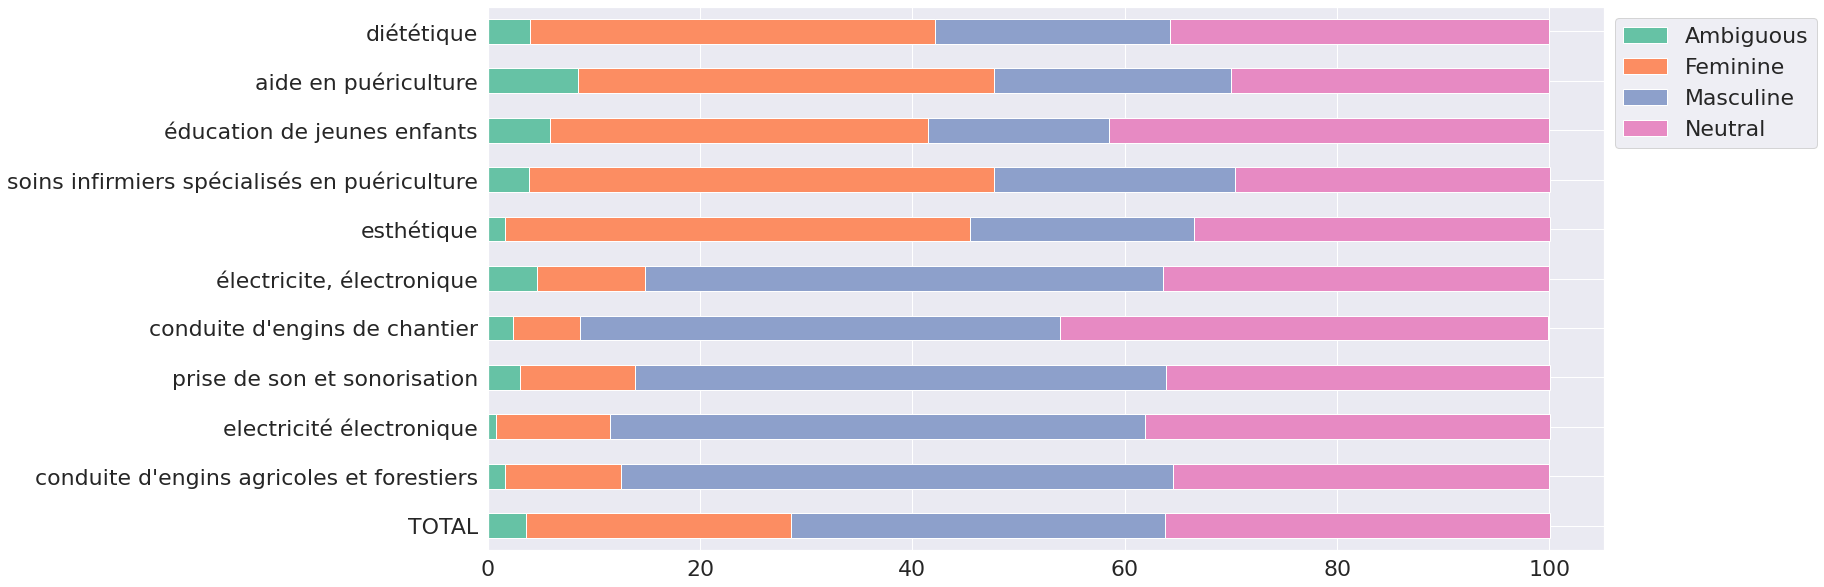

In [28]:
"""FIGURE ET TABLEAU POUR CES THÈMES"""

masc_gap = all_masc_gap
fem_gap = all_fem_gap
warnings.filterwarnings('ignore')
topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/gender_per_topic_10biased.png",bbox_inches = "tight")
ax.plot()

In [29]:
means = {"total":mean_gap_total}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_genre[data_genre["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means[model]=mean_gap
    
means

{'total': 14.829468599033806,
 'bloom-560m': 3.65,
 'bloom-3b': 0.9800000000000025,
 'gpt2-fr': 18.32,
 'xglm-2': 5.51,
 'bloom-7b': 12.469999999999999,
 'vigogne-2-7b': 20.58}

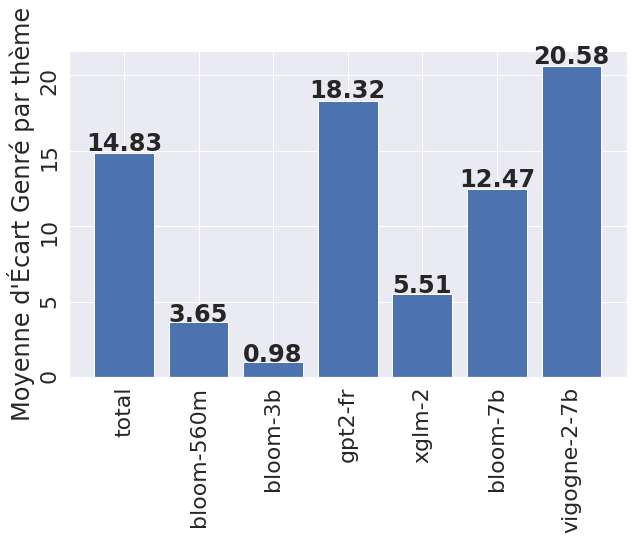

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(means.keys()), list(means.values()))
ax.tick_params(labelrotation=90) 
ax.set_ylabel("Moyenne d'Écart Genré par thème")
#ax.set_title('Problèmes de qualité de données')
i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(list(means.values())[i],2),
             ha='center',
             weight='bold')
    i+=1
    
#plt.savefig("fig/moy_gap_topic_model.png")

In [69]:
def viz_per_topic(dataset):
    """Seulement sur thèmes biaisés, sinon trop"""
    topics = list(set(dataset["theme"]))
    #topics = biased_topics(all_topics, dataset)[0][:10] + biased_topics(all_topics, dataset)[0][-10:]
    bias = [el[0] for el in all_sorted_gap[:10]] + [el[0] for el in all_sorted_gap[-10:]]
    #print(bias)
    table = []

    for topic in topics:
        op = exploration_donnees_per_topic(dataset,label,topic)
        op['topic'] = topic
        if topic in bias:
            table.append(op)

    print(tabulate(table, headers='keys'))

    table_new = dic_list_noempty(table)

    print(table_new)
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)
        
    table_new.insert(0,total)
    #print(table_new)
    
    df = pd.DataFrame(table_new, index=["TOTAL"]+bias)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig("fig/auto_gender_per_topic_10gold.png",bbox_inches = "tight")
    #ax.plot()

viz_per_topic(data_genre)

Masc    Neutre    Fem    Ambigu    topic
------  --------  -----  --------  --------------------------------------------------------------------
50.0%   36.2%     10.8%  3.1%      prise de son et sonorisation
52.0%   35.4%     11.0%  1.6%      conduite d'engins agricoles et forestiers
30.0%   30.0%     36.9%  3.1%      interprétariat et traduction
46.6%   38.8%     11.2%  3.4%      installation et maintenance en froid, conditionnement d'air
45.2%   46.0%     6.3%   2.4%      conduite d'engins de chantier
48.0%   38.2%     13.0%  0.8%      conduite de grue
48.8%   36.4%     10.1%  4.7%      électricite, électronique
51.2%   32.0%     14.4%  2.4%      réparation de carrosserie
22.2%   35.7%     38.1%  4.0%      diététique
50.4%   33.1%     13.5%  3.0%      études et développement informatique
24.6%   34.1%     39.7%  1.6%      maquillage de scène
26.0%   34.6%     33.9%  5.5%      coiffure, esthétique et autres spécialites de services aux personnes
22.3%   30.0%     39.2%  8.5%      aide

NameError: name 'dic_list_noempty' is not defined

## Croisement proportions genre par modèle ET par domaine professionnel


 bloom-560m
Masc    Neutre    Fem    topic                                               Ambigu
------  --------  -----  --------------------------------------------------  --------
55.0%   35.0%     10.0%  conduite d'engins agricoles et forestiers
47.6%   38.1%     9.5%   conduite d'engins de chantier                       4.8%
45.0%   25.0%     25.0%  métallurgie                                         5.0%
38.1%   33.3%     23.8%  direction de chantier du btp                        4.8%
20.8%   50.0%     16.7%  secrétariat et assistanat médical ou médico-social  12.5%
13.0%   34.8%     43.5%  coiffure                                            8.7%
16.7%   37.5%     45.8%  soins infirmiers spécialisés en puériculture
25.0%   25.0%     50.0%  mannequinat et pose artistique
13.6%   31.8%     36.4%  aide en puériculture                                18.2%
35.0%   25.0%     40.0%  mécanique aéronautique et spatiale

 bloom-3b
Masc    Neutre    Fem    topic                             

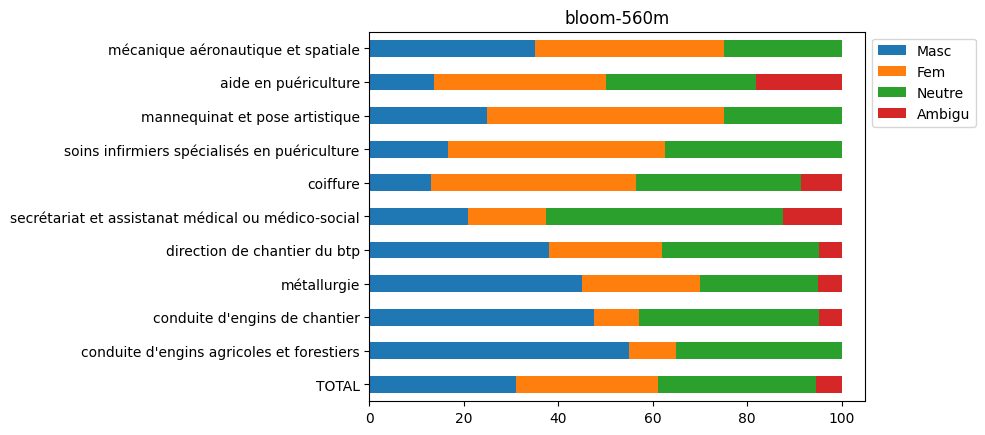

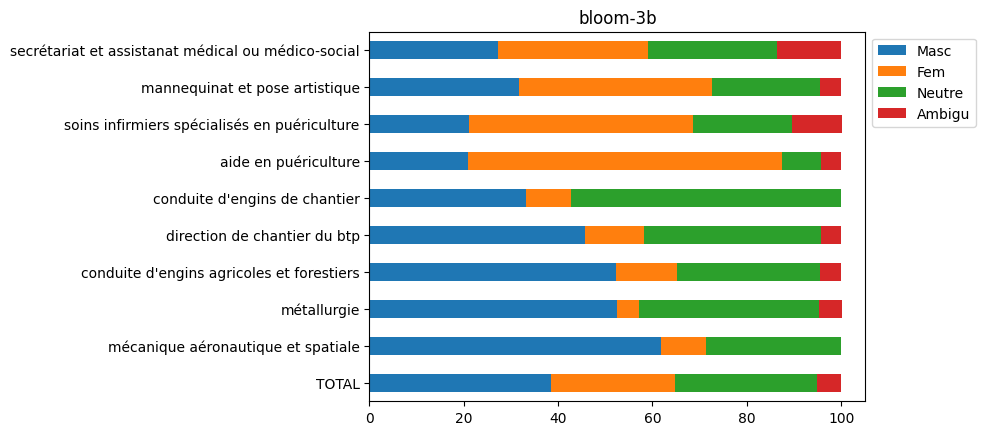

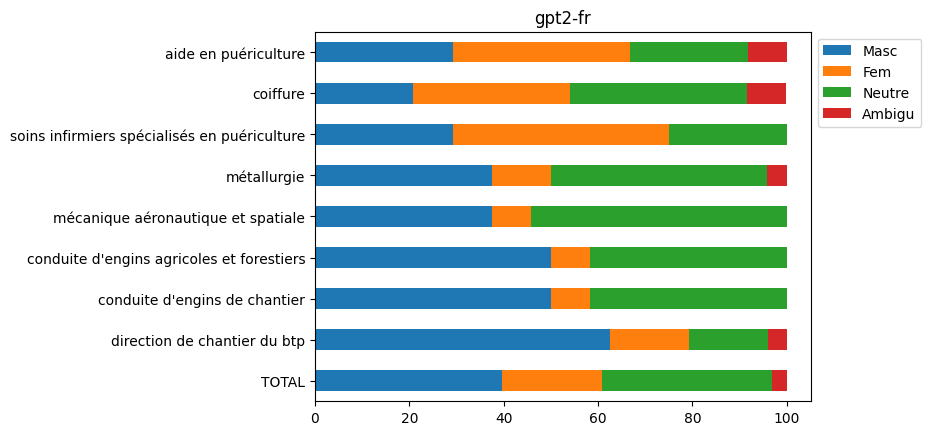

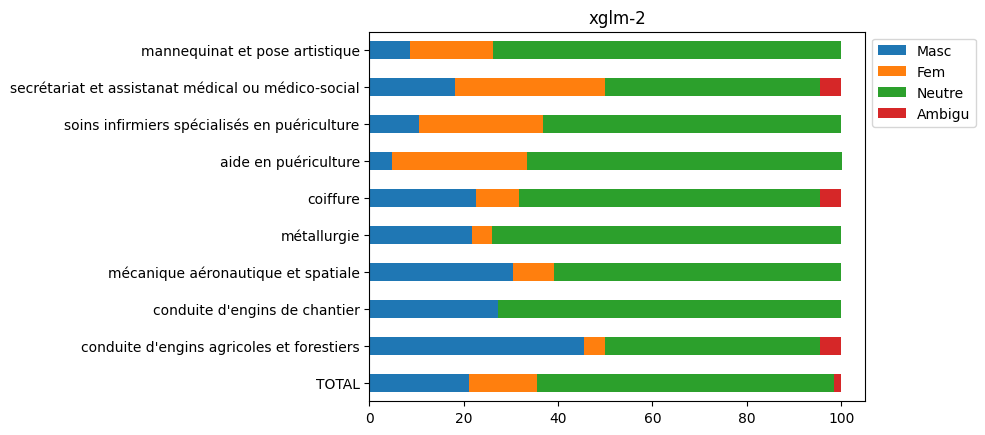

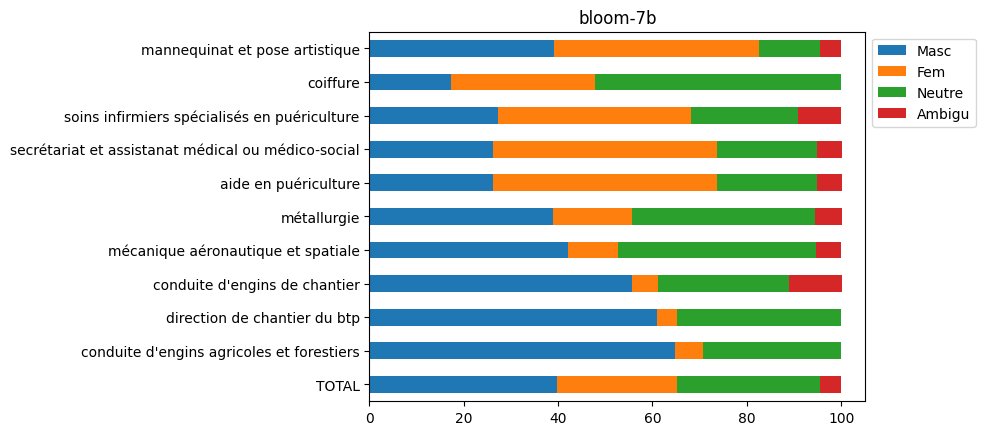

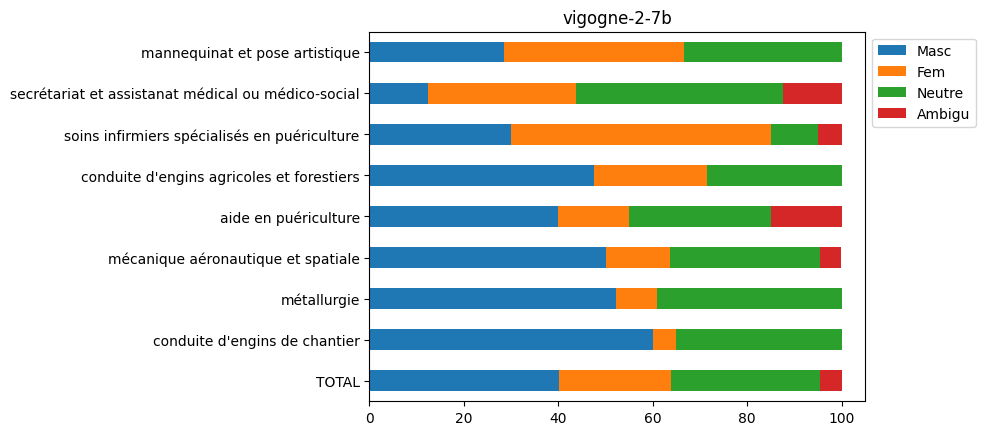

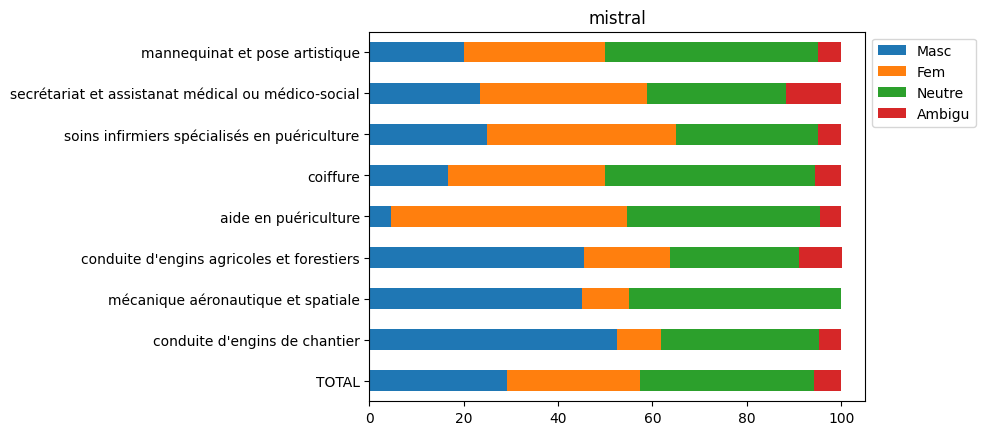

In [18]:
import warnings
def exploration_donnees_per_topic_model(dataset, golden_gender,model, topic ,savecsv=False, savefig = False):
    
    dataset = dataset[dataset["theme"] == topic]
    dataset = dataset[dataset["model"] == model]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {model}, {topic}\n"
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{model}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')

all_topics = list(set(data_genre["theme"]))
topic_mod = {}

"""Ordre par modèle, puis par topic"""
for model in modeles:
    table = []
    sorted_gap, masc_gap, fem_gap = biased_topics(all_topics,data_genre[data_genre["model"] == model])
    topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]
    topic_mod[model]=topics
    for topic in topics:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['topic'] = topic
        table.append(op)

    print("\n",model)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutre","Fem", "Masc","Ambigu"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutre":float(d["Neutre"][:-1]), "Fem":float(d["Fem"][:-1]),
                 "Masc":float(d["Masc"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    #table_new.append(total)
    table_new.insert(0,total)

    """label_topics = ["secrétariat et assistanat médical" if "secrétariat et assistanat médical ou médico-social" in item else item for item in topics]
    label_topics = ["langues étrangères appliquées" if "langues étrangères appliquées au tourisme, au commerce international, aux affaires, à la documentation" in item else item for item in label_topics]
    label_topics = ["installation et maintenance en froid" if "conditionnement d'air" in item else item for item in label_topics]
    label_topics = ["coiffure, esthétique, services" if "autres spécialites de services" in item else item for item in label_topics]
    label_topics = ["prod. et exploit. de systèmes d'info." if "systèmes d'information" in item else item for item in label_topics]
    label_topics = ["qualité et protection santé du btp" if "protection santé du btp" in item else item for item in label_topics]
    label_topics = ["gestion de portefeuilles" if "portefeuilles" in item else item for item in label_topics]
    label_topics = ["soins infirmiers (puériculture)" if "spécialisés en puériculture" in item else item for item in label_topics]
    label_topics = ["soins infirmiers (anesthésie)" if "spécialisés en anesthésie" in item else item for item in label_topics]"""

        
    df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
    ax = df.plot(kind="barh", stacked=True)
    ax.set_title(model,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"fig/auto_gender_per_model+topic_{model}.png",bbox_inches = "tight")
    ax.plot()


 conduite d'engins de chantier
Masc    Neutre    Fem    Ambigu    model
------  --------  -----  --------  ------------
47.6%   38.1%     9.5%   4.8%      bloom-560m
33.3%   57.1%     9.5%             bloom-3b
50.0%   41.7%     8.3%             gpt2-fr
27.3%   72.7%                      xglm-2
55.6%   27.8%     5.6%   11.1%     bloom-7b
60.0%   35.0%     5.0%             vigogne-2-7b
52.4%   33.3%     9.5%   4.8%      mistral

 mécanique aéronautique et spatiale
Fem    Masc    Neutre    model         Ambigu
-----  ------  --------  ------------  --------
40.0%  35.0%   25.0%     bloom-560m
9.5%   61.9%   28.6%     bloom-3b
8.3%   37.5%   54.2%     gpt2-fr
8.7%   30.4%   60.9%     xglm-2
10.5%  42.1%   42.1%     bloom-7b      5.3%
13.6%  50.0%   31.8%     vigogne-2-7b  4.5%
10.0%  45.0%   45.0%     mistral

 conduite d'engins agricoles et forestiers
Masc    Neutre    Fem    model         Ambigu
------  --------  -----  ------------  --------
55.0%   35.0%     10.0%  bloom-560m
52.2%   

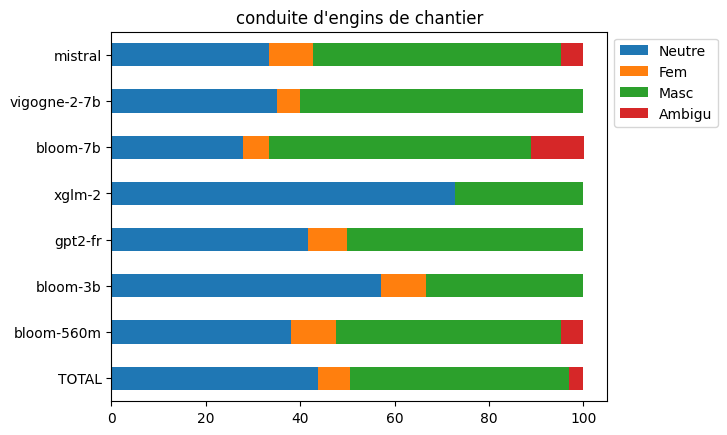

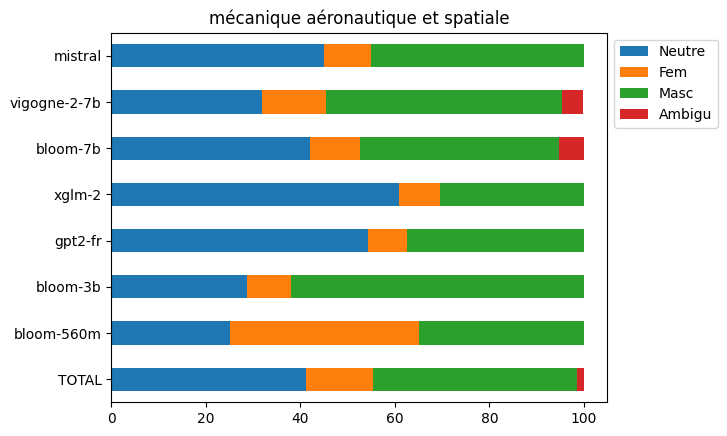

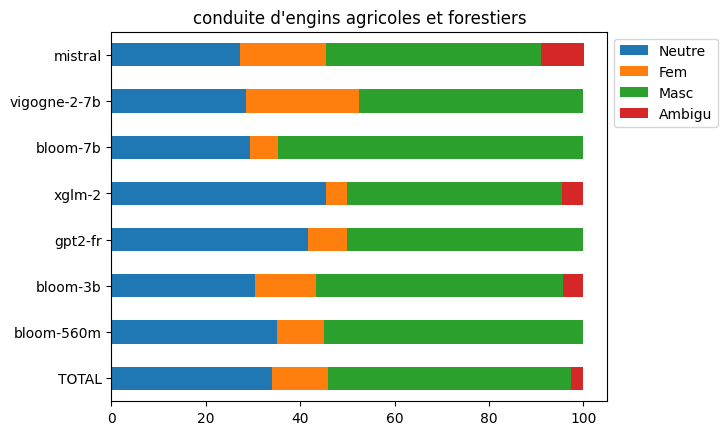

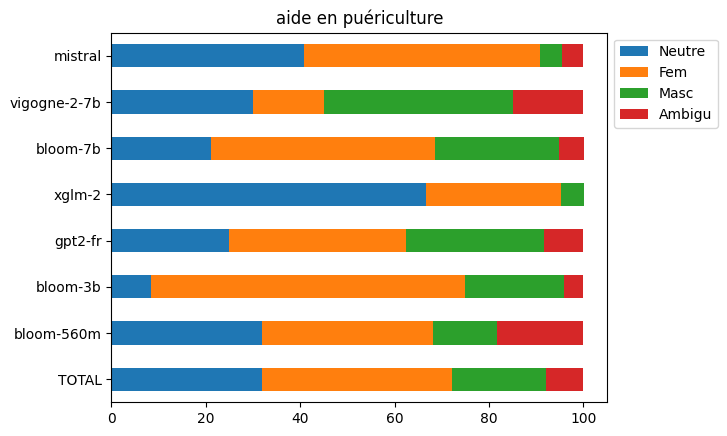

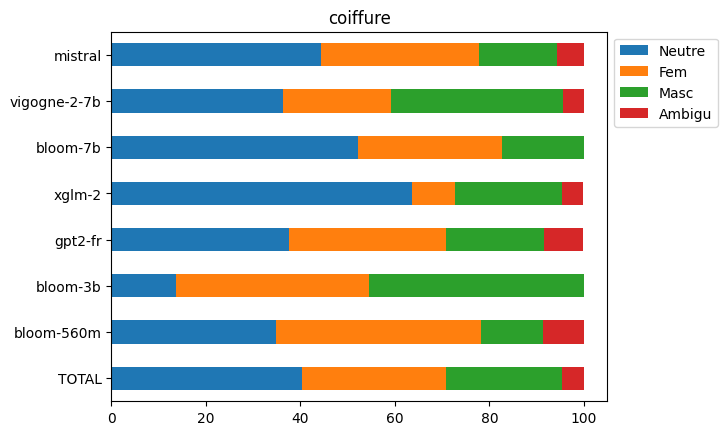

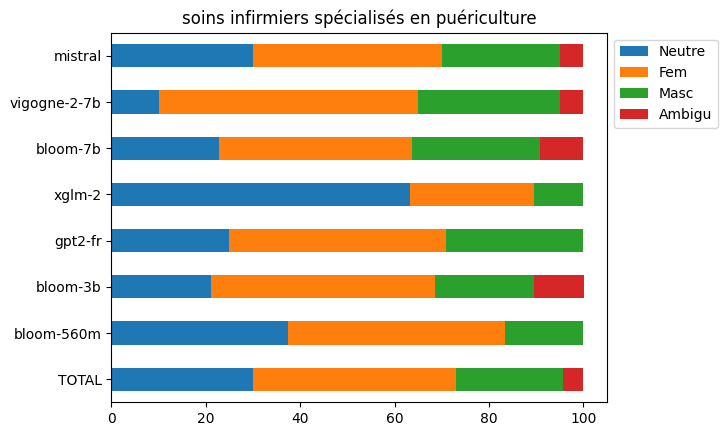

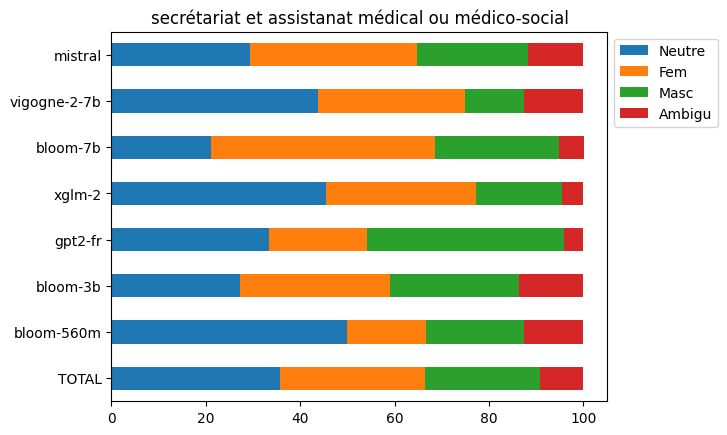

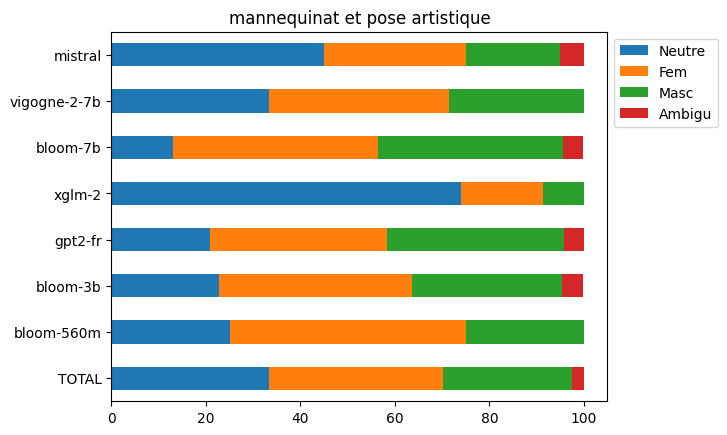

In [19]:
"""Ordre par topic, puis par modèle"""
#modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2.9B"]
for topic in topics:
    table = []
    for model in modeles:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['model'] = model
        table.append(op)

    print("\n",topic)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutre","Fem", "Masc","Ambigu"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutre":float(d["Neutre"][:-1]), "Fem":float(d["Fem"][:-1]),
                 "Masc":float(d["Masc"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]
    new_dic = {}
    for genre in ["Neutre", "Fem", "Masc", "Ambigu"]:
        new_dic[genre] = sum([d[genre] for d in table_new])/len(table_new)
    #table_new.append(new_dic)
    table_new.insert(0,new_dic)
    
    """    # ajouter une barre pour le total
    total = {}
    for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    table_new.append(total)"""

    df = pd.DataFrame(table_new, index=["TOTAL"]+modeles)
    ax = df.plot(kind="barh", stacked=True)
    ax.set_title(topic,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"analyse_fig-tables/gender_per_topic+model_{topic}.png",bbox_inches = "tight")
    ax.plot()

## Stylométrie (stats sur les textes)

Quelques statistiques & graphiques sur les données : moyenne de nombre de mots, de caractères, de mots uniques
(fonction adaptée de code trouvé en ligne : https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e )

In [20]:
def stats_donnees(dataset, label, filtre_model=None):
    cat_m="Masc"
    cat_f="Fem"
    cat_n="Neutre"
    cat_a = "Ambigu"
    
    if filtre_model:
        dataset = dataset[dataset["model"]==filtre_model]
    
    #1. WORD-COUNT
    dataset['word_count'] = dataset["output"].apply(lambda x: len(str(x).split()))
    
    #2. CHARACTER-COUNT
    dataset['char_count'] = dataset['output'].apply(lambda x: len(str(x)))

    #3. UNIQUE WORD-COUNT
    dataset['unique_word_count'] = dataset['output'].apply(lambda x: len(set(str(x).split())))
    
    res_word= {"Masc": dataset[dataset[label]==cat_m]['word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['word_count'].mean(),
              }
    
    res_char= {"Masc": dataset[dataset[label]==cat_m]['char_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['char_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['char_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['char_count'].mean()}

    res_uniqueword= {"Masc": dataset[dataset[label]==cat_m]['unique_word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['unique_word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['unique_word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['unique_word_count'].mean()}

    
    return res_char, res_word, res_uniqueword


table = []
print("Char")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[0]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nWord")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[1]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nUnique word")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[2]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))

"""for model in modeles:
    print("\n ---", model)
    stats_donnees(data_genre, label, model)
    print("*"*60)"""

Char
    Masc       Fem    Neutre    Ambigu    total  model
--------  --------  --------  --------  -------  ------------
 962.708   913.415   718.685   988.75   895.89   bloom-560m
 858.198   960.377   724.887  1030.8    893.565  bloom-3b
 991.116   995.636   980.024  1029.88   999.163  gpt2-fr
 272.542   260.031   219.111   300.333  263.004  xglm-2
1015.03   1047.12    707.59    985.111  938.71   bloom-7b
 678.398   673.234   563.212   771.2    671.511  vigogne-2-7b
 769.414   780.661   813.421   773.1    784.149  mistral

Word
    Masc       Fem    Neutre    Ambigu     total  model
--------  --------  --------  --------  --------  ------------
163.569   155.615   120.164    165.333  151.171   bloom-560m
142.419   159.541   117.903    166.5    146.591   bloom-3b
160.768   164.473   156.683    173.5    163.856   gpt2-fr
 45.4583   43.1562   37.1037    50       43.9296  xglm-2
165       169.288   117.344    162.333  153.492   bloom-7b
111.048   110.809    91.2424   125.3    109.6     v

'for model in modeles:\n    print("\n ---", model)\n    stats_donnees(data_genre, label, model)\n    print("*"*60)'

In [248]:
"""PRÉPARER FICHIERS TXT POUR TXM"""
for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
    df_genre = data_genre[data_genre["Identified_gender"]==genre]
    with open(f"txm/global_{genre}.txt", "w") as f:
        f.write(str(list(df_genre["output"])))